In [ ]:
import pandas as pd
ipl_auction_df = pd.read_csv("IPL_IMB381IPL2013.csv")
#print("ipl_auction_df")
#print(ipl_auction_df.head())
#print("ipl_auction_df.shape")
#print(ipl_auction_df.shape)

# List columns in the DataFrame
print("ipl_auction_df.columns")
print(ipl_auction_df.columns)


ipl_auction_df.iloc[0:5, 0:10]  





In [ ]:
X_features = ipl_auction_df.columns

X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
              'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 
              'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 
              'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 
              'AVE-BL', 'ECON', 'SR-BL']

In [ ]:
ipl_auction_df['PLAYING ROLE'].unique()

In [ ]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

In [ ]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [ ]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features], 
                                        columns = categorical_features,
                                        drop_first = True )

In [ ]:
ipl_auction_encoded_df.columns

In [ ]:
X_features = ipl_auction_encoded_df.columns

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE']

train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 42 )

In [ ]:
# Drop non-numeric columns from train_X
numeric_train_X = train_X.select_dtypes(include=['number'])

# Fit the OLS model
ipl_model_1 = sm.OLS(train_y, numeric_train_X).fit()
ipl_model_1.summary2()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    
    return vif_factors

In [ ]:
# Filter numeric columns from X[X_features]
numeric_X_features = X[X_features].select_dtypes(include=['number'])

# Calculate VIF factors
vif_factors = get_vif_factors(numeric_X_features)
vif_factors

In [41]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

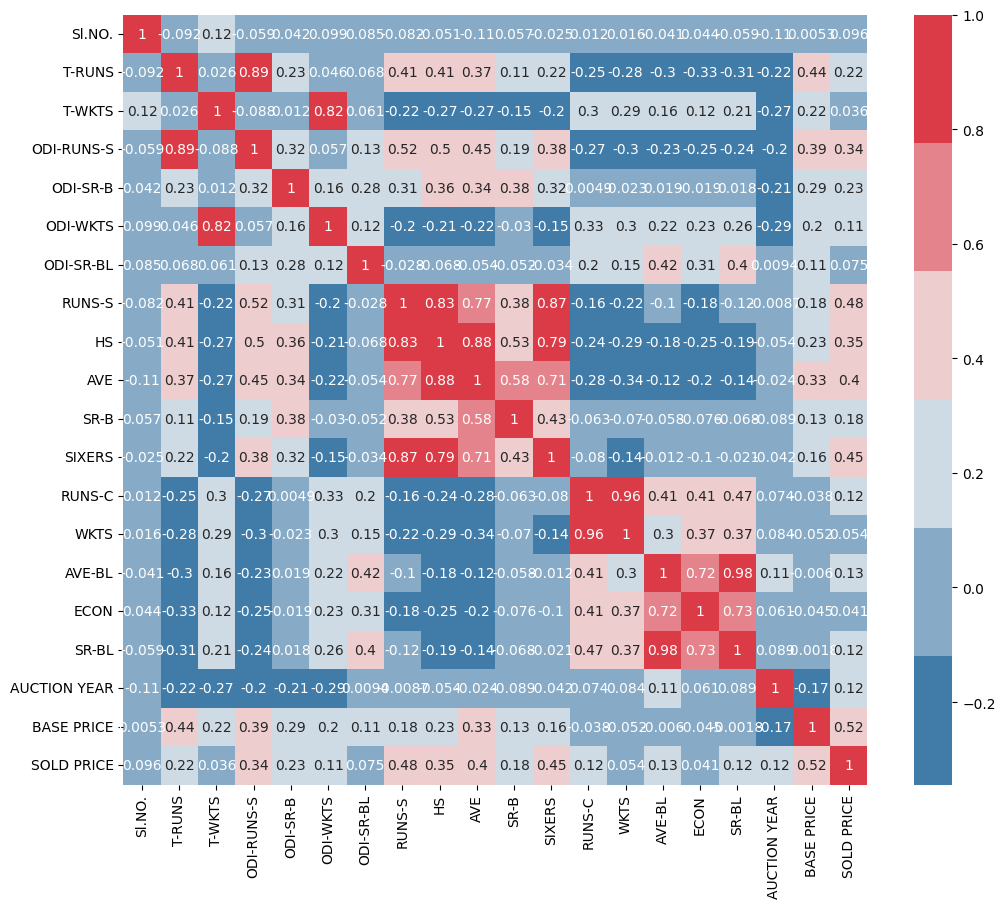

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure( figsize = (12,10) )
sns.heatmap( X[columns_with_large_vif].corr(), 
            annot = True,
            cmap = sns.diverging_palette(240, 10));

In [47]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 
                         'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 
                         'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [48]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )